<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 22 **
** ┗ Employees' turnover prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉SESSION 1 -「Search for turnover status」
* 🥈SESSION 2 -「Establishment and Verification of hypotheses」
* 🥇SESSION 3 -「Predicting ML Utilization


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/22_Employee Resignation Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/22_Employee Resignation Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🎫 (HRD, HRM)

``
As the turnover market has grown actively, employees are also leaving the company.
The leakage of core talents continued to lead to a big problem for the company.In order to solve this problem, the HR team is targeted for key talents with high possibility of turnover.
I want to run a management program.
``


> ** Looking at the data **

* Data on employee profile and work role
* Data specification ⬇

| AGE | attravel | BusinessStravel | dailyrate | department | DistanceFromome |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Age | Whether you are turning out | Business trip | Daily | Department | Distance to your home |
| Education | Educationfield | EMPLOYEECOUNT | EMPLOYEENUMBER | EnvironmentSatismion | Gender |
| Education level | Major | Number of employees | Employee number | Environmental Satisfaction | Gender |
| Hourlyrate | Jobinvolvement | Jobrole | Jobsatism | Maritalstatus |
| Wage | Business immersion | Business Level | Business role | Business Satisfaction | Marriage |
| MonthlyIncome | Monthlyrate | NumcompaniesWorked | Over18 | Overtime | Percentsalaryhike |
| Monthly income | salary | Number of past company experience | 18 years or more | Overtime | Salary increase rate |
| Performancerating | RelateShoipSatisfaction | StandardHours | StockoptionLEVEL | TotalWorkingYears | TrainingTimeslastyear |
| High School | Human relationship satisfaction | Average working hours | Stock option level | Total experience | Last year's training |
| Worklife Burnance | YearsatCompany | YearsIncurrentrole | YearsSINCELASTPROMOTION | YearswithCurmanager |
| Warravel level | Current working -level working years | Current year -long | From the last promotion date |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter22_job_transfer.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Increased number of employees, core talent leakage, and increased work
``

> ** Expected effect **

``
▶ Reduced number of employees, core talent defense, and equalization of business roads
``

> ** Solution **

``
▶ Operation of employee prediction and management program with high possibility of turnover
▶ Session 1 🥉
-DATA pretreatment and turnover status data exploration
▶ Session 2 🥈
-Data search to verify the hypothesis after the hypothesis
▶ Session 3 🥇
-Expation of employees with high possibility of turnover by utilizing ML algorithms
``

> ** Performance measurement **

``
▶ Monitoring the turnover rate after operation of the management program
``

> ** Public application **

``
▶ Create data Mart for input to Model every month
▶ Operation of extracting and management programs for the possibility of the possibility of monthly turnover
``

> ** Main code preview **

``
▶ Session 1 → np.where, groupby.agg ()
▶ Session 2 → np.where, groupby.agg ()
▶ Session 3 → RandomForestClassifier (), Labelencoder (), ROC_AUC_SCORE, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ Exploration of the current status of the job **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ It consists of 1,470 row, 35 cola
print('df', df.shape)

df (1470, 35)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# ▶ Outlier verification
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### · Explore the current status of turnover
---


In [ ]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
# ▶ About 16% turnover rate
237 / (237+1233)

0.16122448979591836

In [ ]:
# ▶ Convert to 1, 0 that can be interpreted in the model
import numpy as np
df['Attrition'] = np.where(df['Attrition']== 'Yes', 1, 0)
df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [ ]:
# ▶ Customer profile (gender / age analysis)

# ▶ Sectionization
import numpy as np
df['Age_gp'] = np.where (df['Age'] <= 30, '30 이하',
                           np.where(df['Age'] <= 40, '30-40대', '40대 이상'))
df[['Age','Age_gp']]

,Age,Age_gp
0,41,40대 이상
1,49,40대 이상
2,37,30-40대
3,33,30-40대
4,27,30 이하
...,...,...
1465,36,30-40대
1466,39,30-40대
1467,27,30 이하
1468,49,40대 이상


In [ ]:
# ▶ Status of turnover by age
df_gp = df.groupby('Age_gp')['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Age_gp,,,
30 이하,386,100,25.9
30-40대,619,85,13.7
40대 이상,465,52,11.2


In [ ]:
# ▶ Gender turnover rate status
df_gp = df.groupby('Gender')['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [ ]:
# ▶ Status of turnover rate by department
df_gp = df.groupby('Department')['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


## ** 🥈Session 2 **
** ┗ Hypothesis establishment and verification **
---

* The perspective of looking at the essence of the problem I should think of from a variety of perspectives
* Focus on understanding the nature of the problem, not focusing on phenomena
* Tasks to quickly establish hypotheses from various perspectives and verify them with data


* ex) Sales fell to MZ generation.
-Did the purchase rate of MZ customers drop?
-Did you increase the leak of competitors?
-Did you change the preferred product of the MZ generation?
-Did you increase online purchases due to the Corona issue?

→ 🔔 ** You must define hypotheses from a variety of perspectives, develop data verification and establish a strategy.


### · Hypothesis (1)
---

* "Business satisfaction is high, but the turnover rate due to human relations will be high."


In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,40대 이상
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,40대 이상
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,30-40대
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,30-40대
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,30 이하


In [ ]:
# ▶ Import only data to be analyzed
df[['JobSatisfaction', 'RelationshipSatisfaction', 'Attrition']].head(5)

,JobSatisfaction,RelationshipSatisfaction,Attrition
0,4,1,1
1,2,4,0
2,3,2,1
3,3,3,0
4,2,4,0


In [ ]:
# ▶ The higher the job satisfaction rate and the lower the work satisfaction, the higher the turnover rate.
df_gp = df.groupby(['JobSatisfaction'])['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
JobSatisfaction,,,
1,289,66,22.8
2,280,46,16.4
3,442,73,16.5
4,459,52,11.3


In [ ]:
# ▶ Employees with high work satisfaction appear to be less affected by the turnover rate depending on the relationship.
# ▶ Employees with low work satisfaction tend to increase the turnover rate as the relationship is worse.
df_gp = df.groupby(['JobSatisfaction', 'RelationshipSatisfaction'])['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

count  sum  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

### · Hypothesis (2)
---

* "If you have a higher share of work compared to the number of years of service, the turnover rate will be high."


In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,40대 이상
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,40대 이상
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,30-40대
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,30-40대
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,30 이하


In [ ]:
# ▶ One rule of one -time role compared to the number of years of service
df['Role_Company'] = df['YearsInCurrentRole']	/ df['YearsAtCompany']
df['Role_Company'].fillna(0, inplace =True)

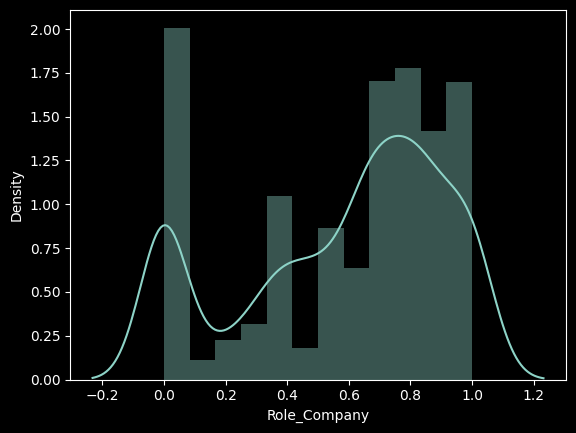

In [ ]:
# ▶ Role_company distribution confirmation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Role_Company']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['Role_Company_gp'] = np.where (df['Role_Company'] <= 0.4, '0.4 이하',
                           np.where(df['Role_Company'] <= 0.8, '0.4-0.8', '0.8 초과'))

df[['Role_Company','Role_Company_gp']]

,Role_Company,Role_Company_gp
0,0.666667,0.4-0.8
1,0.700000,0.4-0.8
2,0.000000,0.4 이하
3,0.875000,0.8 초과
4,1.000000,0.8 초과
...,...,...
1465,0.400000,0.4 이하
1466,1.000000,0.8 초과
1467,0.333333,0.4 이하
1468,0.666667,0.4-0.8


In [ ]:
# ▶ The same as the number of years of service, the turnover rate is low.
df_gp = df.groupby('Role_Company_gp')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
Role_Company_gp,,,
0.4 이하,454,103,22.7
0.4-0.8,621,81,13.0
0.8 초과,395,53,13.4


### · Hypothesis (3)
---

* "If you work a lot overtime, if the salary increase rate is high, the turnover rate will be low."


In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp,Role_Company,Role_Company_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,40대 이상,0.666667,0.4-0.8
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,40대 이상,0.700000,0.4-0.8
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,30-40대,0.000000,0.4 이하
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,30-40대,0.875000,0.8 초과
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,30 이하,1.000000,0.8 초과


In [ ]:
# ▶ Status of turnover due to night shift
df_gp = df.groupby('OverTime')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [ ]:
# ▶ Overnight NO staff, even if the annual salary rate is high, it is difficult to find a tendency not to turn.
df_gp = df.groupby(['OverTime', 'PercentSalaryHike'])['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

count  sum  ratio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [ ]:
# ▶ Overtime YEDY staff data analysis
df_gp_plot = df_gp.reset_index()
df_gp_plot = df_gp_plot[df_gp_plot['OverTime']=='Yes']
df_gp_plot

,OverTime,PercentSalaryHike,count,sum,ratio
15,Yes,11,61,22,36.1
16,Yes,12,59,15,25.4
17,Yes,13,65,20,30.8
18,Yes,14,56,16,28.6
19,Yes,15,21,6,28.6
20,Yes,16,23,6,26.1
21,Yes,17,16,5,31.2
22,Yes,18,29,8,27.6
23,Yes,19,21,6,28.6
24,Yes,20,15,3,20.0


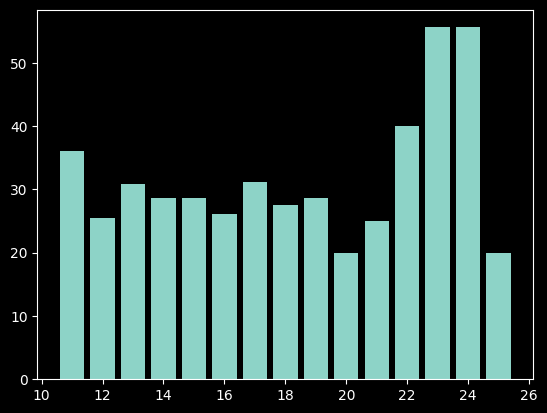

In [ ]:
# ▶ Overtime YES employee data analysis, 20%increase rate seems to decrease, but it is turned to core talents who rise by 22%or more.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

plt.bar(df_gp_plot['PercentSalaryHike'], df_gp_plot['ratio']);

## ** 🥇Session 3 **
** ┗ ML utilization employee forecast **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Age_gp', 'Role_Company_gp']
numeric_list : ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Role_Company']


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['Attrition', 'Age_gp', 'Role_Company_gp', 'Role_Company'], axis=1)
Y=df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1029, 34)
(1029,)
(441, 34)
(441,)


In [ ]:
# ▶ Remove variables generated during the EDA process
categoical_list.remove('Age_gp')
categoical_list.remove('Role_Company_gp')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [ ]:
x_test[categoical_list].head(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1418,1,1,1,1,4,1,0,0
30,2,1,3,1,2,2,0,0
392,2,1,3,1,5,1,0,0
201,0,1,1,1,4,0,0,1
581,2,1,1,1,2,1,0,0


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 123456, max_depth=3, n_estimators=125)
rfc.fit(x_train, y_train)

# prediction

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       863
           1       1.00      0.05      0.09       166

    accuracy                           0.85      1029
   macro avg       0.92      0.52      0.50      1029
weighted avg       0.87      0.85      0.78      1029

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.03      0.05        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.48       441
weighted avg       0.87      0.84      0.78       441



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0,439
1,2


In [ ]:
from sklearn.metrics import classification_report

y_pred_train = rfc.predict_proba(x_train)[:, 1]
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=.3:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = rfc.predict_proba(x_test)[:, 1]
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.3:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       863
           1       0.65      0.32      0.43       166

    accuracy                           0.86      1029
   macro avg       0.76      0.64      0.67      1029
weighted avg       0.84      0.86      0.84      1029

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       370
           1       0.53      0.24      0.33        71

    accuracy                           0.84       441
   macro avg       0.70      0.60      0.62       441
weighted avg       0.81      0.84      0.82       441



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0.0,409
1.0,32


In [ ]:
37/441

0.08390022675736962

In [ ]:
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8529785422105571
roc_score_test : 0.7483060525314046


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # Returns FPR and TPR values ​​according to lymph values.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC curve is painted with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # Change the scale of the FPR X axis to 0.1 units, X, Y -name settings, etc.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

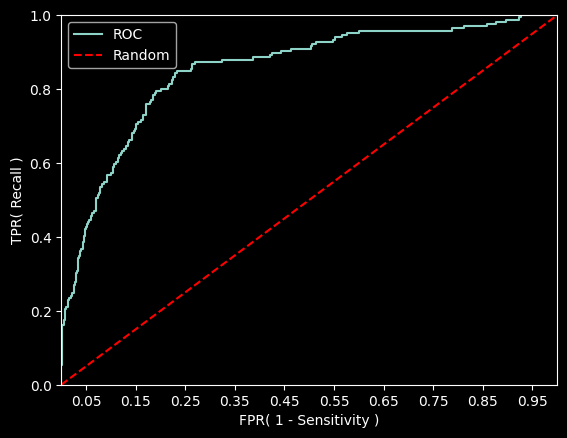

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)

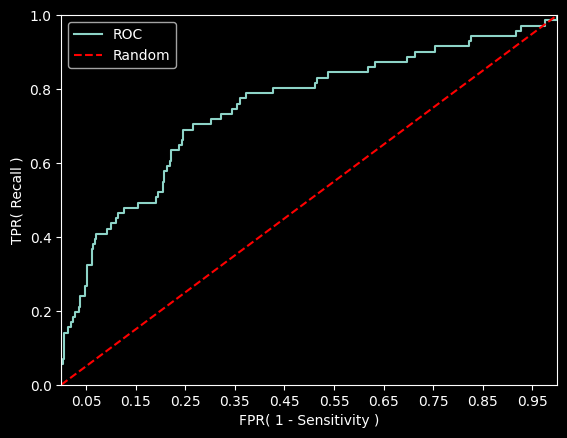

In [ ]:
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


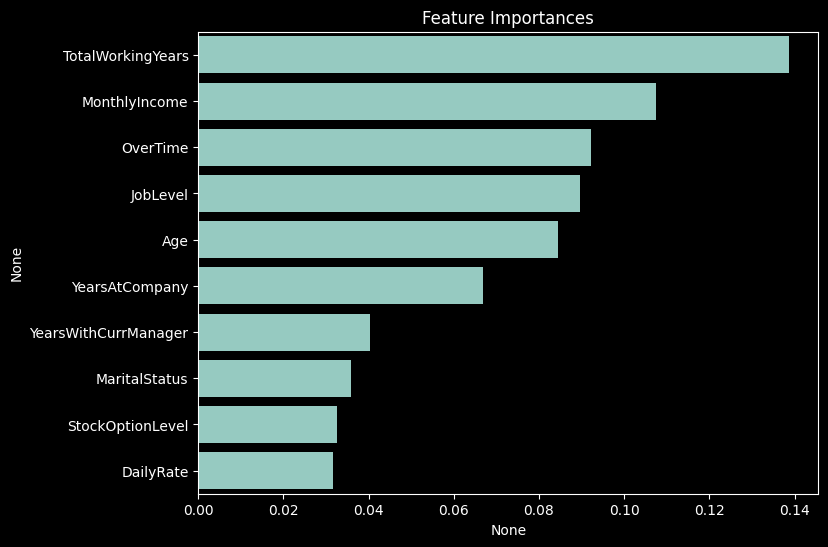

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=10)
plt.show()

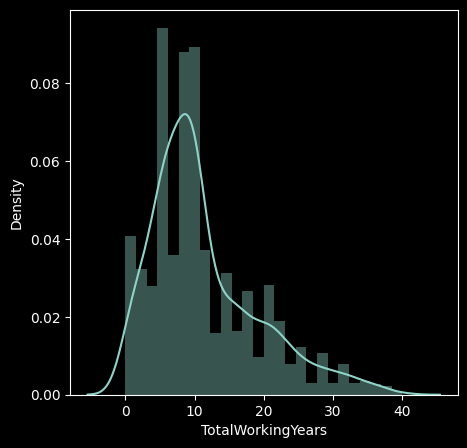

In [ ]:
# ▶ 1st variable search
sns.distplot(df['TotalWorkingYears']);
plt.gcf().set_size_inches(5 ,5)

In [ ]:
# ▶ Sectionization
import numpy as np
df['TotalWorkingYears_gp'] = np.where (df['TotalWorkingYears'] <= 10, '10 이하',
                           np.where(df['TotalWorkingYears'] <= 20, '10-20', '20 초과'))

df[['TotalWorkingYears','TotalWorkingYears_gp']]

,TotalWorkingYears,TotalWorkingYears_gp
0,8,10 이하
1,10,10 이하
2,7,10 이하
3,8,10 이하
4,6,10 이하
...,...,...
1465,17,10-20
1466,9,10 이하
1467,6,10 이하
1468,17,10-20


In [ ]:
# ▶ The lower the salary, the higher the turnover rate.
df_gp = df.groupby('TotalWorkingYears_gp')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
TotalWorkingYears_gp,,,
10 이하,923,182,19.7
10-20,340,39,11.5
20 초과,207,16,7.7



### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)